In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
train_set = pd.read_csv('/Users/tianyaopu/Documents/StanPython/Practice/5790project/imdbreview/Train.csv')
test_set = pd.read_csv('/Users/tianyaopu/Documents/StanPython/Practice/5790project/imdbreview/Test.csv')
validation_set = pd.read_csv('/Users/tianyaopu/Documents/StanPython/Practice/5790project/imdbreview/Valid.csv')
# combine datasets

In [3]:
frames = [train_set,test_set,validation_set]
data = pd.concat(frames)

In [4]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
data.shape

(50000, 2)

<AxesSubplot:xlabel='label'>

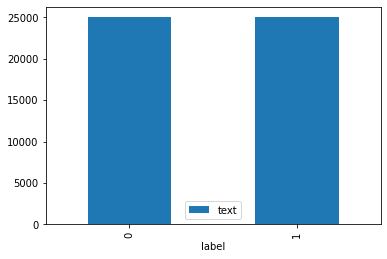

In [6]:
data.groupby('label').count().plot(kind='bar')

<AxesSubplot:xlabel='label'>

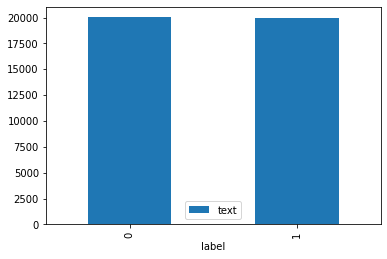

In [7]:
train_set.groupby('label').count().plot(kind='bar')

<AxesSubplot:xlabel='label'>

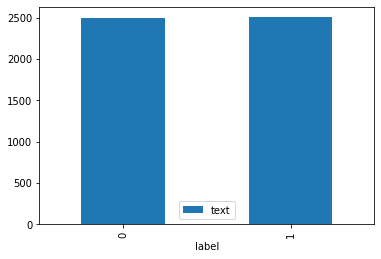

In [8]:
test_set.groupby('label').count().plot(kind='bar')

<AxesSubplot:xlabel='label'>

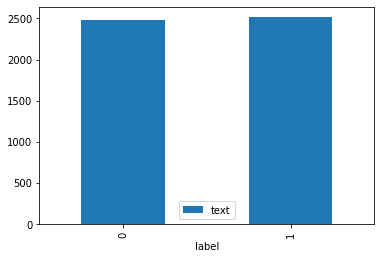

In [9]:
validation_set.groupby('label').count().plot(kind='bar')

In [10]:
review_length = pd.Series([len(review.split()) for review in data['text']])

<AxesSubplot:>

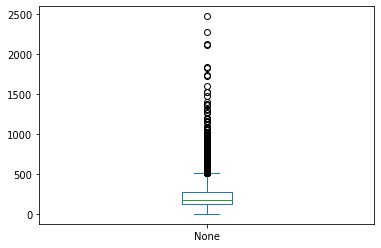

In [11]:
review_length.plot(kind='box')

<AxesSubplot:ylabel='Count'>

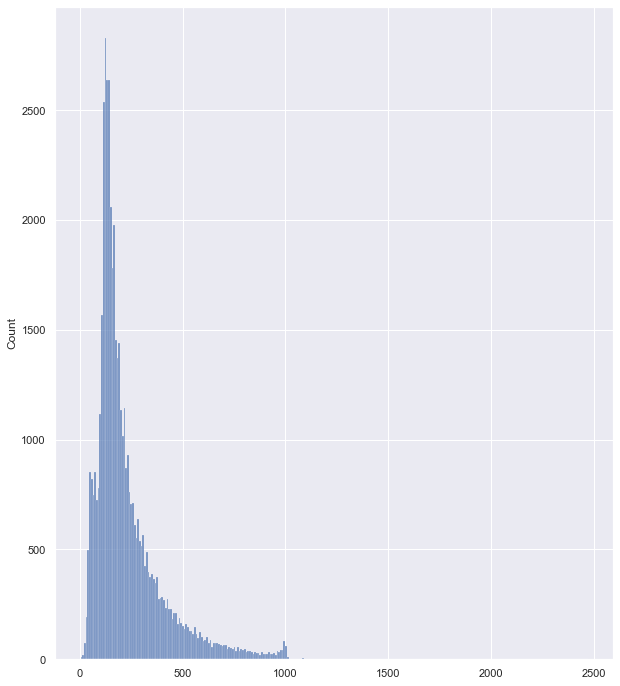

In [12]:
sns.set_theme(
    context='notebook',
    style='darkgrid',
    palette='deep',
    font='sans-serif',
    font_scale=1,
    color_codes=True,
    rc=None,
    )
plt.figure(figsize = (10,12))
sns.histplot(review_length)

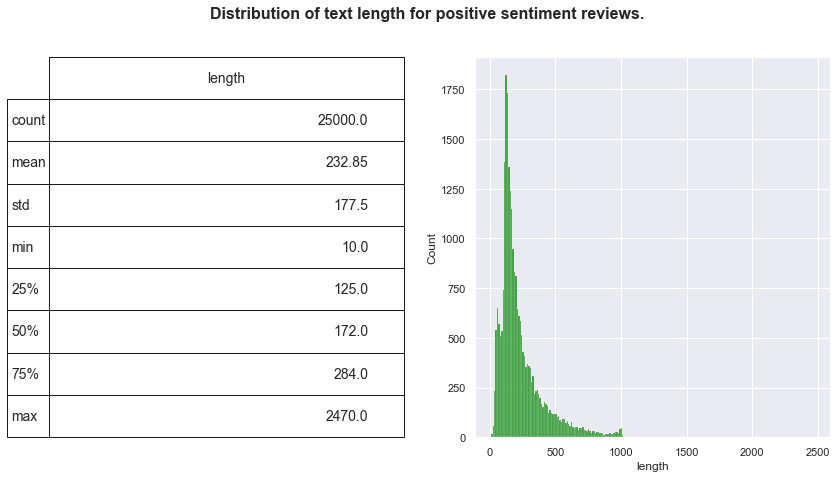

In [13]:
fig = plt.figure(figsize=(14,7))
data['length'] = data.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']==1]['length'], ax=ax1,color='green')
describe = data.length[data.label==1].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment reviews.', fontsize=16,fontweight='bold')

plt.show()

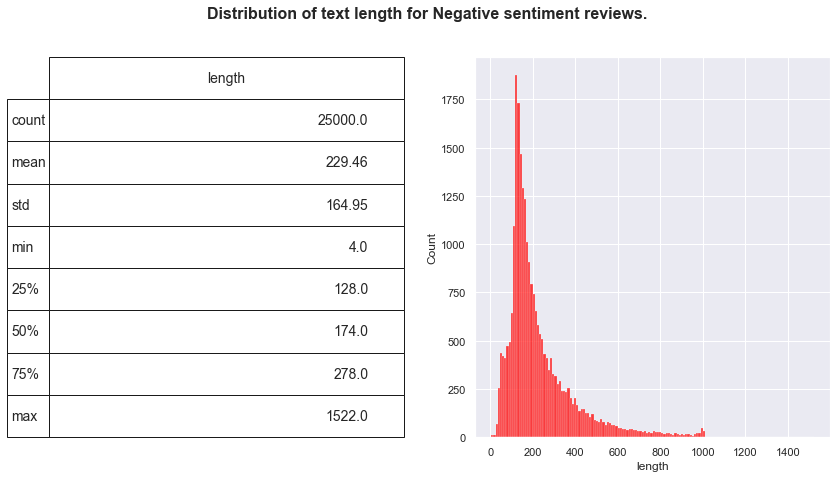

In [14]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(122)
sns.histplot(data[data['label']==0]['length'], ax=ax1,color='red')
describe = data.length[data.label==0].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment reviews.', fontsize=16,fontweight='bold')

plt.show()


In [15]:
# from wordcloud import WordCloud
# plt.figure(figsize = (20,20)) # Negative Review Text
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label == 0].text))
# plt.imshow(wc , interpolation = 'bilinear')

In [16]:
# plt.figure(figsize = (20,20)) # Positive Review Text
# wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.label == 1].text))
# plt.imshow(wc , interpolation = 'bilinear')

In [17]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from bs4 import BeautifulSoup

In [18]:
#Tokenization of text
tokenizer = ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [19]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
# def remove_between_square_brackets(text):
#     return re.sub('\[[^]]*\]', '', text)

def remove_punc(text):
    text = text.lower()
    
    text = re.sub('[^a-z\\s ]+','', text)
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
#     text = remove_between_square_brackets(text)
    text = remove_punc(text)
    return text


In [20]:
#Apply function on review column
data['text'] =data['text'].apply(denoise_text)

In [21]:
data['text'].head()

0    i grew up b  watching and loving the thunderbi...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [22]:
# #Define function for removing special characters
# def remove_special_characters(text, remove_digits=True):
#     pattern=r'[^a-zA-z0-9\s]'
#     text=re.sub(pattern,'',text)
#     return text
# #Apply function on review column
# data['text'] = data['text'].apply(remove_special_characters)

In [23]:
stop_w = stopwords.words('English')

def stop_words(sentence):
    new_text = []
    for word in sentence.split():
        if word not in stop_w:
            new_text.append(word)
    
    return(" ".join(new_text))

data['text'] = data['text'].apply(stop_words)
data.head(20)

,text,label,length
0,grew b watching loving thunderbirds mates scho...,0,151
1,put movie dvd player sat coke chips expectatio...,0,326
2,people know particular time past like feel nee...,0,184
3,even though great interest biblical movies bor...,0,69
4,im die hard dads army fan nothing ever change ...,1,178
5,terrible movie everyone said made laugh cameo ...,0,102
6,finally watched shocking movie last night dist...,1,239
7,caught film azn cable sounded like would good ...,0,271
8,may remake autumns tale eleven years director ...,1,188
9,super ex girlfriend turned pleasant surprise r...,1,282


In [24]:
#lemmatization
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize(sentence):
    new_text = []
    for word in sentence.split():
        word = lemmatizer.lemmatize(word)
        new_text.append(word)
    return(" ".join(new_text))

data['text'] = data['text'].apply(lemmatize)
data.head(20)

,text,label,length
0,grew b watching loving thunderbird mate school...,0,151
1,put movie dvd player sat coke chip expectation...,0,326
2,people know particular time past like feel nee...,0,184
3,even though great interest biblical movie bore...,0,69
4,im die hard dad army fan nothing ever change g...,1,178
5,terrible movie everyone said made laugh cameo ...,0,102
6,finally watched shocking movie last night dist...,1,239
7,caught film azn cable sounded like would good ...,0,271
8,may remake autumn tale eleven year director ma...,1,188
9,super ex girlfriend turned pleasant surprise r...,1,282


In [25]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
data['text'] =data['text'].apply(remove_stopwords)

{"it's", "don't", 'when', 'such', 'ain', 'don', 'shan', 'who', 'here', 'to', 'before', 'hasn', 'both', 'y', "wouldn't", 'what', 'ours', 'each', 'ourselves', 'which', 'they', 'being', 'him', 'not', "couldn't", "isn't", 'same', 'hadn', 'themselves', 'any', 'those', 'just', 'ma', 'an', 'his', 'your', 'why', 'more', "you're", 'down', "needn't", "hadn't", 'into', 'above', 'that', 'of', 'its', 'again', 'were', 'no', "aren't", 'between', 'been', 'nor', 'so', 'm', 'only', 're', 'be', 'once', 'o', 'as', 'is', 'had', 'if', 'will', 'few', 'off', 'herself', 'most', "should've", 'mightn', 'them', 'it', 'hers', 'should', 'have', 'how', "wasn't", 'himself', "weren't", 'but', 'we', 'where', 'shouldn', 'because', "doesn't", "that'll", "she's", 'can', 'having', 'all', 'whom', 'from', 'you', 'i', 'in', 'with', 'couldn', 't', 'theirs', 'about', 'was', "mustn't", 'other', 'has', 'than', 'their', 's', 'too', 'then', 'did', 'or', 'he', 'these', 'a', 'll', "shan't", 'against', 'wouldn', "you'd", 'wasn', 'doin

In [26]:
from sklearn.model_selection import train_test_split

review_train, review_test, sentiment_train, sentiment_test = train_test_split(data['text'],data['label'],test_size = 0.2)


In [27]:
# #Count vectorizer for bag of words
# cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
# #transformed train reviews
# cv_train_reviews=cv.fit_transform(review_train)
# #transformed test reviews
# cv_test_reviews=cv.transform(review_test)

# print('BOW_cv_train:',cv_train_reviews.shape)
# print('BOW_cv_test:',cv_test_reviews.shape)
# #vocab=cv.get_feature_names()-toget feature names

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df = 10, ngram_range=(1,2))
# original tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(review_train)
#transformed test reviews
tv_test_reviews=tv.transform(review_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 62871)
Tfidf_test: (10000, 62871)


In [30]:
sentiment_train.shape,sentiment_test.shape

((40000,), (10000,))

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000,random_state = 42,C=10,penalty='l2')  #penalty='l2',max_iter=500,C=1,random_state=42
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,sentiment_train)
print(lr_tfidf)

LogisticRegression(C=10, max_iter=10000, random_state=42)


In [32]:
lr_tfidf_predict = lr.predict(tv_test_reviews)
lr_tfidf_predict

array([0, 0, 1, ..., 0, 1, 1])

In [33]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#Accuracy score for bag of words
# lr_bow_score=accuracy_score(sentiment_test,lr_bow_predict)
# print("lr_bow_score :",lr_bow_score)


lr_tfidf_score=accuracy_score(sentiment_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_tfidf_score : 0.9049


In [34]:
# from sklearn import svm
# clf = svm.SVC(gamma=0.01, C=100)
# clf_tfidf = clf.fit(tv_train_reviews,sentiment_train)

# print(clf_tfidf)

In [35]:
# svm_tfidf_predict = clf.predict(tv_test_reviews)
# svm_tfidf_predict

In [36]:
# print("Accuracy socre is below: ")
# print(accuracy_score(sentiment_test, svm_tfidf_predict))

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

In [38]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
# model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

In [39]:
# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [40]:
tokenized = data['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True)))

In [41]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [42]:
np.array(padded).shape

(50000, 512)

In [43]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(50000, 512)

In [ ]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

train_features, test_features, train_labels, test_labels = train_test_split(features, data['label'])

lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

lr_clf.score(test_features, test_labels)